In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torch.optim import lr_scheduler

In [2]:
from scripts.mnistParity import MNISTParity
from scripts.architecture import MLP
from scripts.train_utils import accuracy
from scripts.train import train_epoch, train_model, test_model
from scripts.plot_utils import plot_loss_accuracy, plotValAccuracy

In [3]:
print(torch.__version__)
print(np.__version__)

1.9.0
1.20.3


## Create Parity Data Iterator

In [4]:
transforms = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

In [5]:
# doesn't perform and transformation until we call the loader
trainset = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transforms)
testset = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transforms)

/home/john/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
learn_rate = 0.05
num_epochs = 20
batch_size = 128
loss_fn = torch.nn.CrossEntropyLoss()

### For k = 1

In [7]:
k=1
model = MLP(k, "ReLU")
optimizer = torch.optim.Adadelta(model.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 14159.8603 - average: 0.2360; Performance: 0.9115
TESTING - loss 1472.9198664426804 - performance 0.9467
Epoch 2 completed. Loss - total: 7148.0667 - average: 0.1191; Performance: 0.9601
TESTING - loss 1004.6716816723347 - performance 0.9657
Epoch 3 completed. Loss - total: 5399.7731 - average: 0.0900; Performance: 0.9701
TESTING - loss 811.1510388553143 - performance 0.9727
Epoch 4 completed. Loss - total: 4488.4469 - average: 0.0748; Performance: 0.9754
TESTING - loss 702.708475291729 - performance 0.9763
Epoch 5 completed. Loss - total: 3896.0846 - average: 0.0649; Performance: 0.9785
TESTING - loss 632.9136118292809 - performance 0.9784
Epoch 6 completed. Loss - total: 3467.5064 - average: 0.0578; Performance: 0.9809
TESTING - loss 584.3880735337734 - performance 0.9804
Epoch 7 completed. Loss - total: 3134.7983 - average: 0.0522; Performance: 0.9834
TESTING - loss 547.7326326072216 - performance 0.9819
Epoch 8 completed. Loss - t

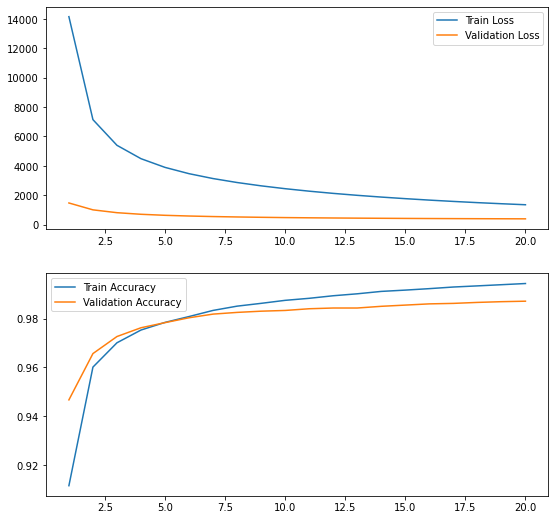

In [8]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

In [9]:
k=1
model2 = MLP(k, "ReLU")
optimizer = torch.optim.SGD(model2.parameters(), lr=learn_rate)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model2, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy, device="cuda:0",lr = learn_rate, lr_scheduler=None, updateWManually=True)


Training on cuda:0
Epoch 1 completed. Loss - total: 10176.7421 - average: 0.1696; Performance: 0.9369
TESTING - loss 1001.4617815613747 - performance 0.9644
Epoch 2 completed. Loss - total: 4826.3362 - average: 0.0804; Performance: 0.9730
TESTING - loss 726.2587286531925 - performance 0.9749
Epoch 3 completed. Loss - total: 3674.1429 - average: 0.0612; Performance: 0.9794
TESTING - loss 615.4309865087271 - performance 0.9781
Epoch 4 completed. Loss - total: 3030.2935 - average: 0.0505; Performance: 0.9835
TESTING - loss 550.6934281438589 - performance 0.9794
Epoch 5 completed. Loss - total: 2580.4378 - average: 0.0430; Performance: 0.9865
TESTING - loss 503.95718216896057 - performance 0.9816
Epoch 6 completed. Loss - total: 2233.0019 - average: 0.0372; Performance: 0.9885
TESTING - loss 471.02262917906046 - performance 0.9833
Epoch 7 completed. Loss - total: 1950.8525 - average: 0.0325; Performance: 0.9901
TESTING - loss 447.81771395355463 - performance 0.9839
Epoch 8 completed. Loss 

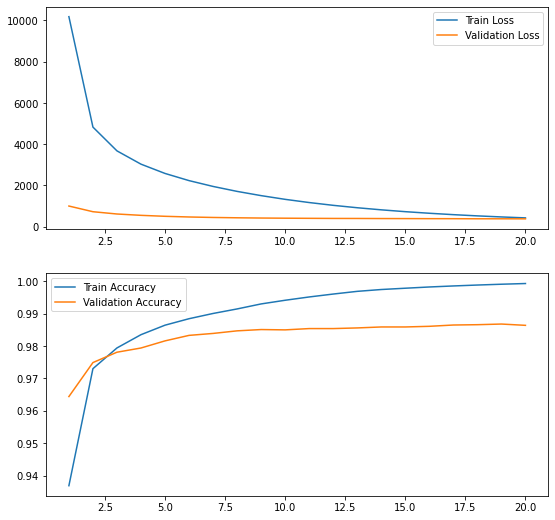

In [10]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

### For k = 3

In [11]:
k = 3

model3 = MLP(k,"ReLU")
optimizer = torch.optim.Adadelta(model3.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList3, trainAccList3, valLossList3, valAccList3  = train_model(model3, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 41912.9817 - average: 0.6985; Performance: 0.5022
TESTING - loss 6938.186466693878 - performance 0.5084
Epoch 2 completed. Loss - total: 41349.3986 - average: 0.6892; Performance: 0.5284
TESTING - loss 6799.532055854797 - performance 0.5650
Epoch 3 completed. Loss - total: 40078.5356 - average: 0.6680; Performance: 0.5887
TESTING - loss 6505.987703800201 - performance 0.6200
Epoch 4 completed. Loss - total: 37940.8193 - average: 0.6323; Performance: 0.6443
TESTING - loss 6115.80765247345 - performance 0.6646
Epoch 5 completed. Loss - total: 36033.5340 - average: 0.6006; Performance: 0.6713
TESTING - loss 5895.758628845215 - performance 0.6737
Epoch 6 completed. Loss - total: 34856.7743 - average: 0.5809; Performance: 0.6816
TESTING - loss 5693.540334701538 - performance 0.6903
Epoch 7 completed. Loss - total: 33941.0457 - average: 0.5657; Performance: 0.6934
TESTING - loss 5542.111754417419 - performance 0.7003
Epoch 8 completed. Loss

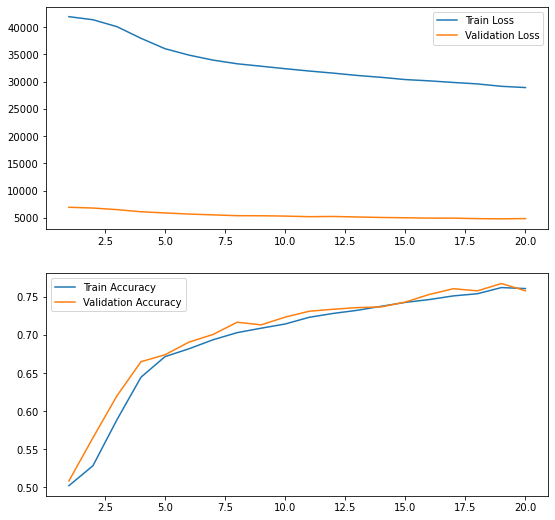

In [12]:
plot_loss_accuracy(trainLostList3,valLossList3,trainAccList3,valAccList3,num_epochs)

In [13]:
k = 3
model4 = MLP(k, "ReLU")
optimizer = torch.optim.SGD(model4.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList4, trainAccList4, valLossList4, valAccList4  = train_model(model4, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 41770.4925 - average: 0.6962; Performance: 0.5077
TESTING - loss 6908.689320087433 - performance 0.5204
Epoch 2 completed. Loss - total: 40551.2228 - average: 0.6759; Performance: 0.5591
TESTING - loss 6455.670893192291 - performance 0.6221
Epoch 3 completed. Loss - total: 37095.9573 - average: 0.6183; Performance: 0.6448
TESTING - loss 5881.108462810516 - performance 0.6694
Epoch 4 completed. Loss - total: 35146.8026 - average: 0.5858; Performance: 0.6708
TESTING - loss 5649.76042509079 - performance 0.6989
Epoch 5 completed. Loss - total: 34225.6711 - average: 0.5704; Performance: 0.6842
TESTING - loss 5571.258246898651 - performance 0.6950
Epoch 6 completed. Loss - total: 33542.5854 - average: 0.5590; Performance: 0.6925
TESTING - loss 5621.666491031647 - performance 0.6835
Epoch 7 completed. Loss - total: 33110.4003 - average: 0.5518; Performance: 0.7004
TESTING - loss 5405.994355678558 - performance 0.7152
Epoch 8 completed. Loss

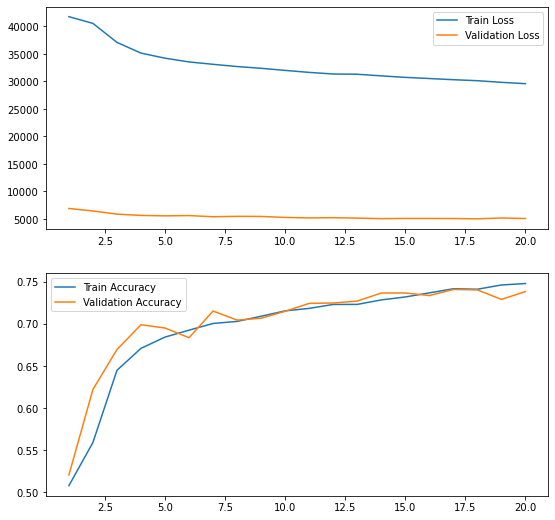

In [14]:
plot_loss_accuracy(trainLostList4,valLossList4,trainAccList4,valAccList4,num_epochs)

In [ ]:
# Add Lazy methods
learn_rate = 0.05
K = 3
num_epochs = 20

fig = plt.figure()
for activation in ["ReLU", "NTK", "Gaussian features", "ReLU features", "linear features", "SGD"]:
    model = MLP(K, activation)

    if "features" in activation:
        # deactivate the first layer
        optimizer = torch.optim.Adadelta(model.layer2.parameters(), lr = learn_rate, weight_decay=0.001)
    elif "NTK" in activation:
        paramsToUpdate = list(model.layer1.parameters()) + list(model.layer2.parameters())
        optimizer = torch.optim.Adadelta(paramsToUpdate, lr = learn_rate, weight_decay=0.001)
    elif "SGD" in activation:
        optimizer = torch.optim.SGD(model.parameters(), lr = learn_rate, weight_decay=0.001)
    else:
        optimizer = torch.optim.Adadelta(model.parameters(), lr = learn_rate, weight_decay=0.001)

    print("Activation:",activation)

    trainLostList, trainAccList, valLossList, valAccList  = train_model(model, K, trainset, testset, loss_fn, optimizer, num_epochs, 
                                                                        batch_size, validate_model = True, performance=accuracy, 
                                                                        device="cuda:0", lr_scheduler=None)

    plotValAccuracy(valAccList,num_epochs, activation, K)

fig.savefig(str(K) + "valAccuracy.png")
plt.show()
dataset = MNISTParity(trainset, K, 128)
dataset.plotRandomData()

# just need to find good lr and weight_decay values for lazy methods to have more similar plots to paper
